In [44]:
#setting up 
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress 
from pprint import pprint 

#importing csv data variables 
international_drug_seizures_path = "seizures_1.csv"
world_data_path = "worlddata.csv"

drug_seizures = pd.read_csv(international_drug_seizures_path)
world_data = pd.read_csv(world_data_path)

#merge data
world_data = pd.merge(drug_seizures, world_data, how='outer', on='country')
world_data


,Region,country,ISO Code,Drug Group,Drug,Year,KG Equivalent,electricity_access,gdp,gdp_capita,...,air_pollution,population_density,population,alcohol_consumption,unemployment_rate,social_support,freedom,generosity,income_class,cpi
0,Africa,Algeria,DZA,Cannabis-type,Marijuana (herb),1970.0,141.0,99.49,1.680000e+11,4117.84,...,100.0,17.10,40736509.00,0.5844,10.540,0.785,0.510,-0.182,Lower middle income,34.50
1,Africa,Algeria,DZA,Cannabis-type,Hashish (resin),1970.0,140.0,99.49,1.680000e+11,4117.84,...,100.0,17.10,40736509.00,0.5844,10.540,0.785,0.510,-0.182,Lower middle income,34.50
2,Africa,Algeria,DZA,Cannabis-type,Marijuana (herb),1980.0,240.0,99.49,1.680000e+11,4117.84,...,100.0,17.10,40736509.00,0.5844,10.540,0.785,0.510,-0.182,Lower middle income,34.50
3,Africa,Algeria,DZA,Opioids,Heroin,1981.0,0.4,99.49,1.680000e+11,4117.84,...,100.0,17.10,40736509.00,0.5844,10.540,0.785,0.510,-0.182,Lower middle income,34.50
4,Africa,Algeria,DZA,Cannabis-type,Marijuana (herb),1981.0,14.0,99.49,1.680000e+11,4117.84,...,100.0,17.10,40736509.00,0.5844,10.540,0.785,0.510,-0.182,Lower middle income,34.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51216,NaN,St. Vincent and the Grenadines,NaN,NaN,NaN,NaN,NaN,99.79,8.323060e+08,7866.97,...,100.0,271.33,105818.75,7.0072,18.999,NaN,NaN,NaN,Upper middle income,58.67
51217,NaN,Syria,NaN,NaN,NaN,NaN,NaN,88.87,1.673330e+10,874.01,...,100.0,104.13,19121566.50,0.2900,8.745,0.464,0.448,NaN,Low income,14.50
51218,NaN,Tanzania,NaN,NaN,NaN,NaN,NaN,31.51,5.185807e+10,964.88,...,100.0,62.46,55325525.00,11.6454,2.167,0.702,0.785,0.138,Lower middle income,33.50
51219,NaN,Timor-Leste,NaN,NaN,NaN,NaN,NaN,77.12,1.601170e+09,1298.28,...,100.0,82.98,1233863.75,0.4733,4.645,NaN,NaN,NaN,Lower middle income,34.00


In [45]:
#Hypothesis: Drug Seizures have increased in the last twenty years. 
#creating a data frame for drug seizures by year and weight
yearly_mean = drug_seizures['KG Equivalent'].groupby(drug_seizures['Year']).mean()
yearly_median = drug_seizures['KG Equivalent'].groupby(drug_seizures['Year']).median()
yearly_var = drug_seizures['KG Equivalent'].groupby(drug_seizures['Year']).var()
yearly_std = drug_seizures['KG Equivalent'].groupby(drug_seizures['Year']).std()
yearly_sem = drug_seizures['KG Equivalent'].groupby(drug_seizures['Year']).sem()

yearly_summary = pd.DataFrame({'Yearly Mean' : yearly_mean, 'Yearly Median' : yearly_median, 'Yearly Variance': yearly_var, 'Yearly Std. Dev.' : yearly_std, 'Yearly Std. Err' : yearly_sem })
yearly_summary

,Yearly Mean,Yearly Median,Yearly Variance,Yearly Std. Dev.,Yearly Std. Err
Year,,,,,
1970,1199.597605,73.000000,1.117103e+07,3.342308e+03,643.227554
1971,60.353074,2.056148,1.386919e+04,1.177675e+02,58.883768
1972,118.500000,118.500000,2.668050e+04,1.633417e+02,115.500000
1973,101.909189,32.000000,1.762164e+04,1.327465e+02,76.641235
1974,79.570219,39.740438,1.165770e+04,1.079708e+02,53.985406
1975,79.325122,24.100244,1.628612e+04,1.276171e+02,63.808540
1976,87.451673,17.000000,1.856301e+04,1.362461e+02,60.931122
1977,119.563216,2.150000,7.000246e+04,2.645798e+02,108.014240
1978,85.615981,2.500000,3.708416e+04,1.925725e+02,78.617384


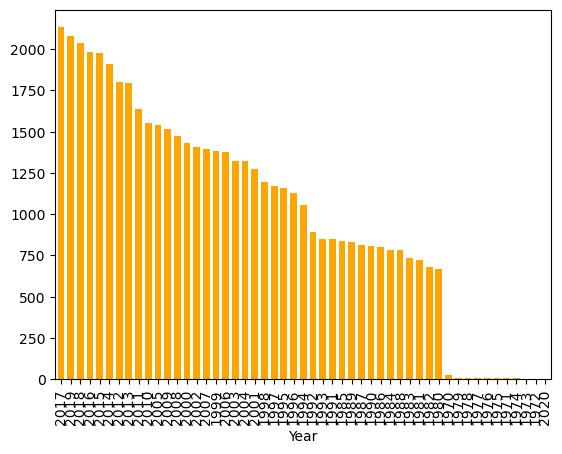

In [46]:
# bar plot for yearly drug seizures 
year_count = drug_seizures['Year'].value_counts()
year_bar = year_count.plot.bar(width = .7 ,color = 'orange', alpha = 1, linewidth = .8)

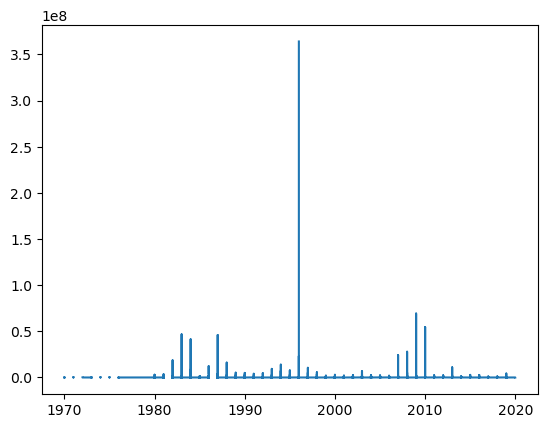

In [47]:
# creating a line graph for seizures per year 
year_line = plt.plot(drug_seizures['Year'],drug_seizures['KG Equivalent'])


<Axes: ylabel='count'>

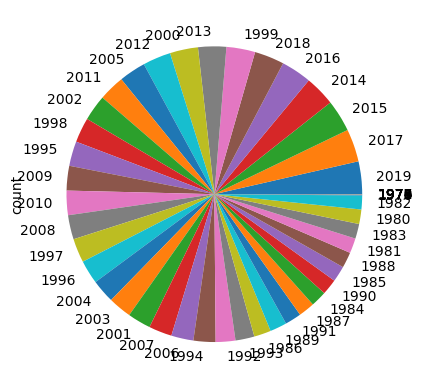

In [48]:
#creating pie charts to see what countries had the most active seizures in a couple of years 
drug_group = drug_seizures.loc[drug_seizures["Drug Group"]=="Opioids"]
year_pie = countries1975["Year"].value_counts()
year_pie.plot.pie()



<Axes: xlabel='country'>

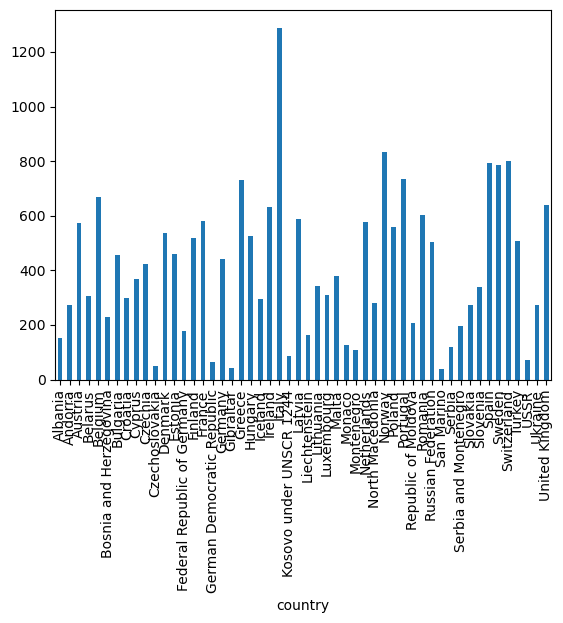

In [53]:
#dividing seizures by country 
drug_group = drug_seizures.loc[drug_seizures["Region"]=="Europe"].groupby("country")
country_pie = drug_group["country"].value_counts()
country_pie.plot.bar()


<Axes: >

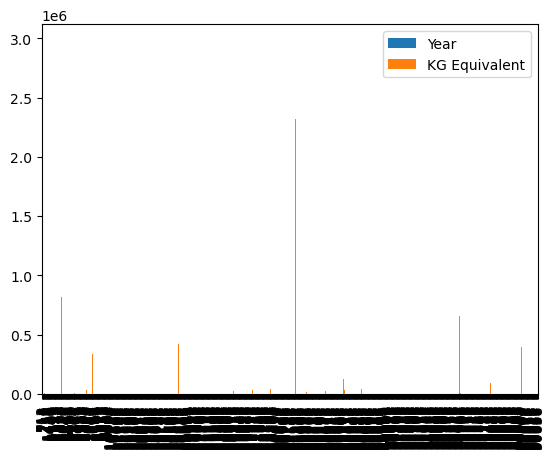

In [64]:
usa = drug_seizures.loc[drug_seizures["Drug Group"]=="Opioids"]
usa_pie = drug_seizures.loc[drug_seizures["country"]=="United States of America"]
usa_pie.plot.bar()